In [1]:
cd /Volumes/mac/MSPA/basic machine learning/final/the-movies-dataset

/Volumes/mac/MSPA/basic machine learning/final/the-movies-dataset


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from surprise.model_selection import PredefinedKFold
from surprise.model_selection import cross_validate, KFold
from surprise import Dataset, Reader
import hybrid
from surprise import KNNWithMeans, SVD, SVDpp, CoClustering, NMF, SlopeOne, KNNWithZScore,NormalPredictor, BaselineOnly
from surprise import accuracy
from collections import defaultdict
from sigweight import KNNSigWeighting
import pickle
from surprise.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

In [3]:
reader = Reader(line_format='user item rating', sep=',', skip_lines=1)
data = Dataset.load_from_file("ratings_small.csv", reader = reader)
random_state = 20
cv = KFold(n_splits = 5, random_state = random_state)

In [4]:
bsl = BaselineOnly()
rmse1 = cross_validate(bsl, data, verbose=True, cv = cv, measures = ['RMSE'])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8922  0.9002  0.8890  0.8965  0.8888  0.8933  0.0044  
Fit time          0.06    0.06    0.10    0.05    0.05    0.07    0.02    
Test time         0.13    0.15    0.13    0.12    0.09    0.12    0.02    


In [5]:
user_knn = KNNWithMeans(k = 3, sim_options={'user_based': True})
rmse2 = cross_validate(user_knn, data, verbose=True, cv = cv, measures = ['RMSE'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9917  0.9962  0.9899  1.0011  0.9901  0.9938  0.0043  
Fit time          0.22    0.33    0.29    0.46    0.30    0.32    0.08    
Test time         1.79    1.82    1.73    1.12    0.70    1.43    0.45    


In [6]:
item_knn = KNNWithMeans(k = 3, sim_options={'user_based': False})
rmse2_2 = cross_validate(item_knn, data, verbose=True, cv = cv, measures = ['RMSE'])

Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0179  1.0218  1.0154  1.0207  1.0194  1.0190  0.0022  
Fit time          14.92   14.80   14.24   13.50   3.95    12.28   4.19    
Test time         7.90    7.89    7.78    7.72    3.34    6.93    1.79    


In [7]:
user_knn_weight = KNNSigWeighting(k = 3,sim_options={'user_based': True})
item_knn_weight = KNNSigWeighting(k = 3, sim_options={'user_based': False})
rmse3 = cross_validate(user_knn_weight, data, verbose=True, cv = cv, measures = ['RMSE'])
rmse4 = cross_validate(item_knn_weight, data, verbose=True, cv = cv, measures = ['RMSE'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNSigWeighting on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9763  0.9792  0.9673  0.9778  0.9689  0.9739  0.0048  
Fit time          5.86    6.07    5.94    5.96    2.40    5.25    1.43    
Test time         1.61    1.63    1.60    1.28    0.69    1.36    0.36    
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing s

In [8]:
hybrid_knn_weight = hybrid.WeightedHybrid([user_knn_weight, item_knn_weight])
rmse5 = cross_validate(hybrid_knn_weight, data, verbose=True, cv = cv, measures = ['RMSE'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Learned weights [ 0.42710102  0.57289898]
Learned weights [ 0.43462275  0.56537725]
Learned weights [ 0.43553693  0.56446307]
Learned weights [ 0.42534939  0.57465061]
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Learned weights [ 0.42294895  0.57705105]
Evaluating RMSE of algorithm WeightedHybrid on 5 split(s).



In [9]:
user_knnz = KNNWithZScore(k = 3, sim_options={'user_based': True})
item_knnz = KNNWithZScore(k = 3, sim_options={'user_based': False})
rmse6 = cross_validate(user_knnz, data, verbose=True, cv = cv, measures = ['RMSE'])
rmse7 = cross_validate(item_knnz, data, verbose=True, cv = cv, measures = ['RMSE'])


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0042  1.0106  1.0063  1.0166  1.0010  1.0077  0.0054  
Fit time          0.30    0.37    0.34    0.42    0.31    0.35    0.04    
Test time         1.82    1.84    1.65    1.40    0.74    1.49    0.41    
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing sim

In [10]:
svd = SVD()
slopeone = SlopeOne()
nmf = NMF()
rmse8 = cross_validate(svd, data, verbose=True, cv = cv, measures = ['RMSE'])
rmse9 = cross_validate(slopeone, data, verbose=True, cv = cv, measures = ['RMSE'])
rmse10 = cross_validate(nmf, data, verbose=True, cv = cv, measures = ['RMSE'])

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8943  0.9050  0.8919  0.8994  0.8926  0.8966  0.0049  
Fit time          7.99    8.48    7.95    8.15    4.44    7.40    1.49    
Test time         0.41    0.34    0.38    0.27    0.13    0.30    0.10    
Evaluating RMSE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9287  0.9360  0.9194  0.9312  0.9276  0.9286  0.0054  
Fit time          6.46    6.54    6.42    6.84    3.53    5.96    1.22    
Test time         7.73    7.94    7.88    7.52    3.47    6.91    1.73    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9477  0.9492  0.9455  0.9532  0.9438  0.9479  0.0032  
Fit time          9.44    9.68    9.72    9.58    4.86    8.65    1.90    
Test time         0.37 

In [11]:
rmse = np.stack((rmse1['test_rmse'],rmse2['test_rmse'],rmse2_2['test_rmse'], rmse3['test_rmse'],
         rmse4['test_rmse'],rmse5['test_rmse'],rmse6['test_rmse'],
         rmse7['test_rmse'],rmse8['test_rmse'],rmse9['test_rmse'],rmse10['test_rmse']))

In [12]:
rmse

array([[ 0.89224257,  0.90022124,  0.88895455,  0.89645073,  0.88881498],
       [ 0.99173704,  0.99619915,  0.98990262,  1.00112181,  0.99011474],
       [ 1.01787119,  1.02178156,  1.01542473,  1.02074671,  1.01935463],
       [ 0.97633944,  0.97919061,  0.96729746,  0.97777475,  0.96889823],
       [ 0.96870227,  0.97154392,  0.96680686,  0.97444585,  0.97711404],
       [ 0.91659057,  0.91987346,  0.9136801 ,  0.92106106,  0.91966883],
       [ 1.00415293,  1.01056862,  1.00628812,  1.01662829,  1.00098045],
       [ 1.02919334,  1.03727855,  1.03034831,  1.0355527 ,  1.03493893],
       [ 0.89427493,  0.90500271,  0.89193882,  0.89937823,  0.89258193],
       [ 0.92874456,  0.93597472,  0.91940512,  0.93115958,  0.92760273],
       [ 0.94770358,  0.94921027,  0.9454914 ,  0.95321255,  0.94380442]])

In [13]:
import matplotlib.pyplot as plt

In [14]:
rmse = pd.DataFrame(rmse.T)

In [15]:
rmse.columns = ["BaselineOnly","user_knn","item_knn","user_knn_weight","item_knn_weight",
               "hybrid_knn_weight","user_knn_zscore","item_knn_zscore","SVD","Slopeone","NMF"]

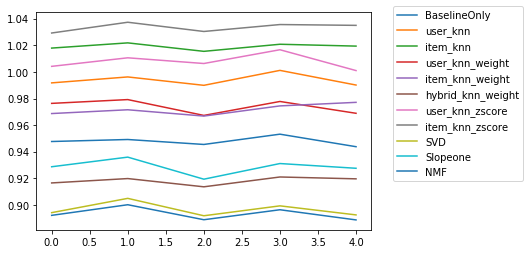

In [16]:
fig, ax = plt.subplots()
ax.plot(rmse)
ax.legend(rmse.columns,bbox_to_anchor=(1.05, 1.05))
plt.show()

In [18]:
all_train = data.build_full_trainset()
hybrid_knn_weight.fit(all_train)
all_test = all_train.build_anti_testset()
predictions = hybrid_knn_weight.test(all_test)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Learned weights [ 0.48775829  0.51224171]


In [19]:
bsl.fit(all_train)
svd.fit(all_train)

Estimating biases using als...


In [46]:
test_train = all_train.build_testset()

In [47]:
pred_train_1 = hybrid_knn_weight.test(test_train)
pred_train_2 = bsl.test(test_train)
pred_train_3 = svd.test(test_train)

In [103]:
def get_top_n(predictions, n=10, rank = True):
   
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est, true_r))

    # Then sort the predictions for each user and retrieve the k highest ones.
    if rank:
        for uid, user_ratings in top_n.items():
            user_ratings.sort(key=lambda x: x[1], reverse=True)
            top_n[uid] = user_ratings[:n]
    return top_n

In [104]:
result_1 = get_top_n(pred_train_1, rank = False)
result_2 = get_top_n(pred_train_2, rank = False)
result_3 = get_top_n(pred_train_3, rank = False)

In [105]:
result_1 = pd.DataFrame(result_1['1'], columns = ['movieId','predicted_rating','True_Rating'])
result_2 = pd.DataFrame(result_2['1'], columns = ['movieId','predicted_rating','True_Rating'])
result_3 = pd.DataFrame(result_3['1'], columns = ['movieId','predicted_rating','True_Rating'])

In [119]:
result = [result_1.predicted_rating - result_1.True_Rating, result_2.predicted_rating- result_1.True_Rating, result_3.predicted_rating-result_1.True_Rating]

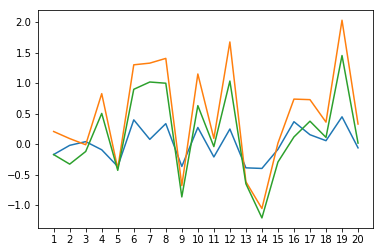

In [130]:
for i in result:
    plt.plot(np.arange(1, len(result[0]) + 1), i)
plt.xticks(np.arange(1, len(result[0]) + 1))
plt.show()

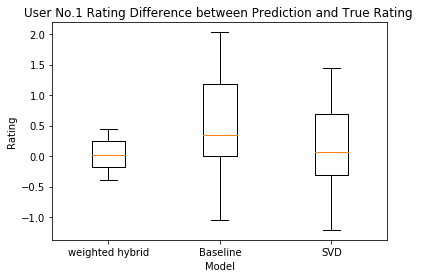

In [122]:
plt.boxplot(result, labels = ["weighted hybrid","Baseline","SVD"])
plt.title("User No.1 Rating Difference between Prediction and True Rating ")
plt.ylabel("Rating")
plt.xlabel("Model")
plt.show()

In [20]:
pred_bsl = bsl.test(all_test)
pred_svd = svd.test(all_test)

In [39]:
pred_1 = get_top_n(predictions, 100)
pred_2 = get_top_n(pred_bsl, 100)
pred_3 = get_top_n(pred_svd, 100)

In [40]:
pred_1 = pd.DataFrame(pred_1['1'], columns = ['movieId','predicted_rating','True_Rating'])

In [41]:
pred_2 = pd.DataFrame(pred_2['1'], columns = ['movieId','predicted_rating','True_Rating'])
pred_3 = pd.DataFrame(pred_3['1'], columns = ['movieId','predicted_rating','True_Rating'])

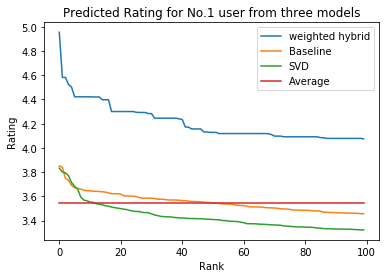

In [43]:
plt.plot(pred_1.predicted_rating)
plt.plot(pred_2.predicted_rating)
plt.plot(pred_3.predicted_rating)
plt.plot(pred_1.True_Rating)
plt.legend(["weighted hybrid","Baseline","SVD",'Average'])
plt.title("Predicted Rating for No.1 user from three models")
plt.ylabel("Rating")
plt.xlabel("Rank")
plt.show()